In [16]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [70]:
x = np.random.randint(25, 50, (25, 2))
y = np.random.randint(60, 85, (25, 2))
z = np.vstack((x, y))
z = np.float32(z)
print(z)

[[25. 29.]
 [41. 29.]
 [48. 31.]
 [46. 25.]
 [37. 31.]
 [35. 28.]
 [26. 30.]
 [27. 34.]
 [34. 39.]
 [39. 41.]
 [36. 32.]
 [35. 45.]
 [49. 36.]
 [39. 38.]
 [38. 35.]
 [40. 38.]
 [43. 37.]
 [39. 44.]
 [48. 45.]
 [44. 26.]
 [34. 45.]
 [40. 37.]
 [34. 36.]
 [39. 43.]
 [42. 28.]
 [70. 73.]
 [73. 69.]
 [73. 77.]
 [78. 60.]
 [63. 76.]
 [79. 77.]
 [66. 72.]
 [70. 66.]
 [65. 73.]
 [64. 62.]
 [61. 81.]
 [68. 84.]
 [64. 68.]
 [73. 64.]
 [81. 75.]
 [75. 84.]
 [74. 66.]
 [79. 77.]
 [74. 63.]
 [84. 84.]
 [71. 73.]
 [77. 78.]
 [76. 62.]
 [62. 84.]
 [62. 67.]]


In [71]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv2.kmeans(z, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [72]:
a = z[label.ravel() == 0]
b = z[label.ravel() == 1]

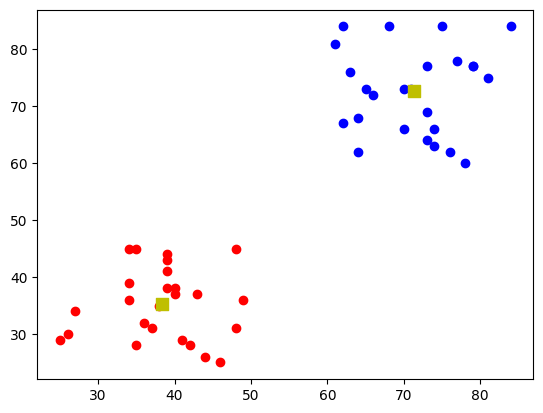

In [73]:
plt.scatter(a[:, 0], a[:, 1], c = 'b')
plt.scatter(b[:, 0], b[:, 1], c='r')
plt.scatter(center[:, 0], center[:, 1], s=80, c='y', marker='s')

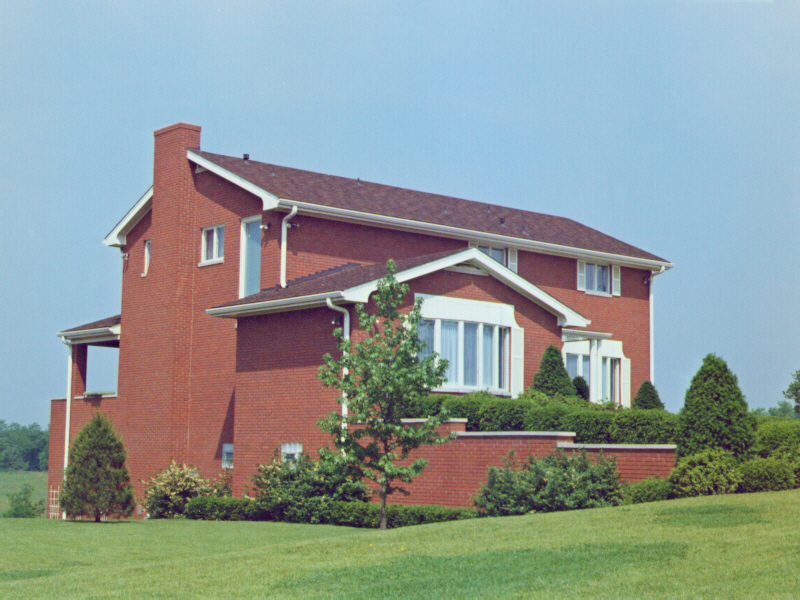

In [21]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/home3.jpg')

cv2_imshow(img)

In [22]:
z = img.reshape((-1, 3))
z=np.float32(z)
print(z.shape)

(480000, 3)


In [53]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 5
ret, label, center = cv2.kmeans(z, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

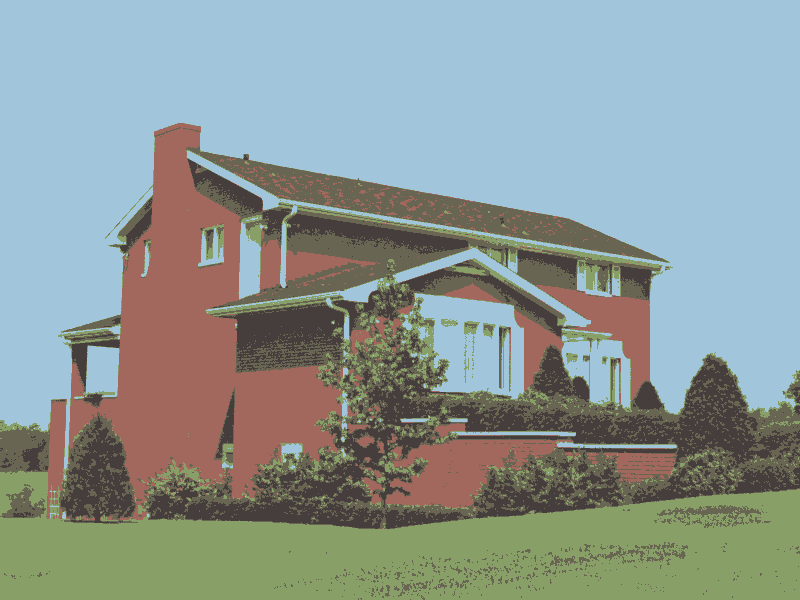

In [24]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2_imshow(res2)

(480, 1622, 3)
(480, 1622)


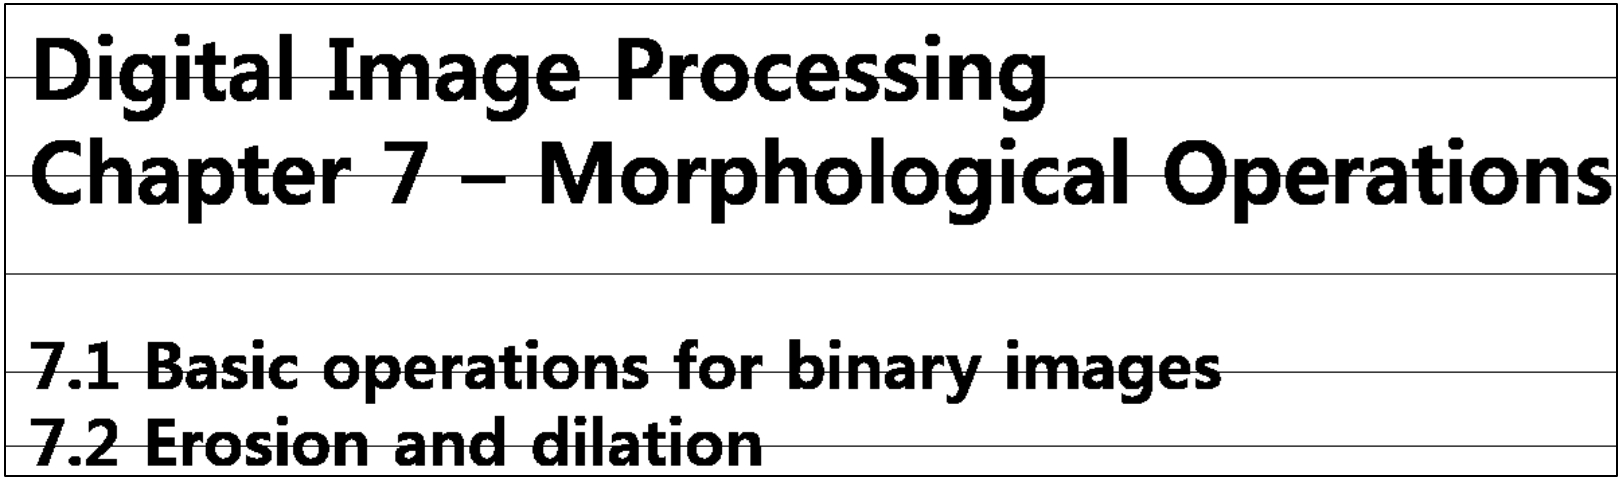

In [25]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/scanimg.jpg')
print(img.shape)
gImg1=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gImg1.shape)
cv2_imshow(gImg1)

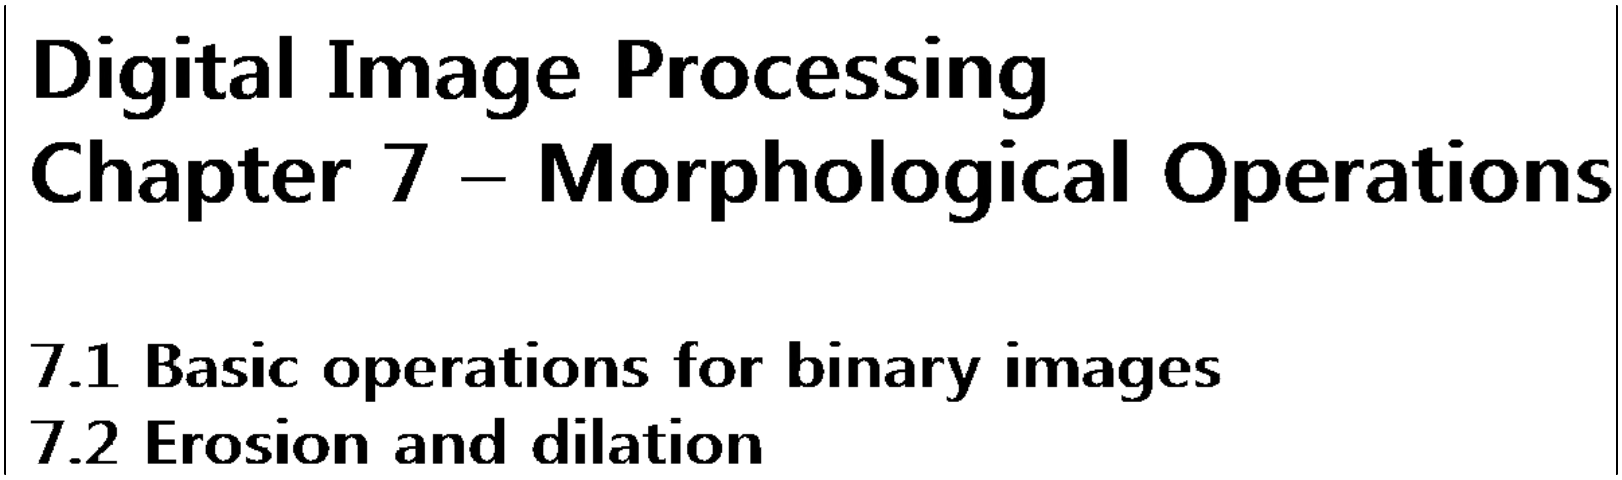

In [39]:
kernel = np.ones((3,1), np.uint8)
dilate = cv2.dilate(gImg1, kernel, iterations=2)
cv2_imshow(dilate)

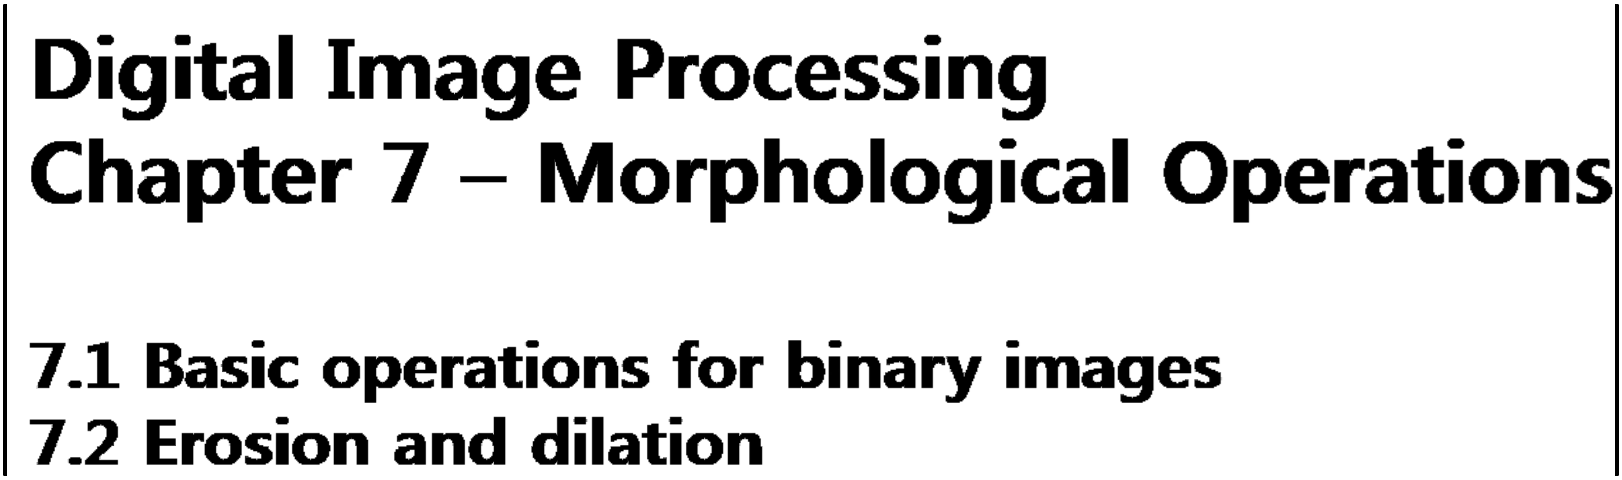

In [40]:
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(dilate, kernel, iterations=1)
cv2_imshow(erosion)

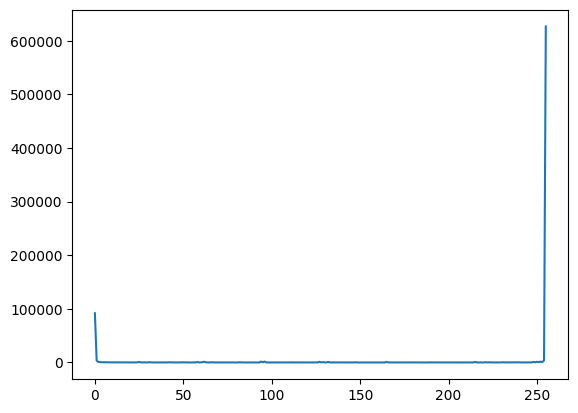

In [41]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0, 256])
plt.plot(hist)

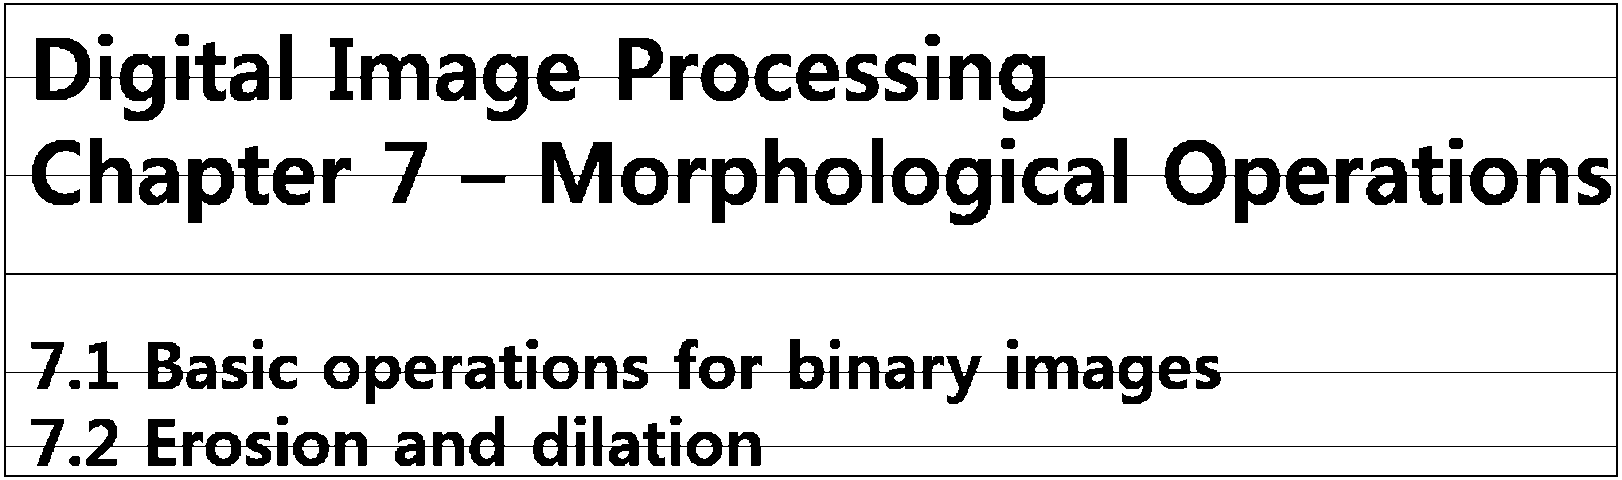

In [50]:

gBin = np.zeros((gImg1.shape[0], gImg1.shape[1]), dtype= np.uint8)

threshold = 100

for i in range(gImg1.shape[0]):
  for j in range(gImg1.shape[1]):
    if gImg1[i, j] > 100:
      gBin[i, j] = 255
cv2_imshow(gBin)

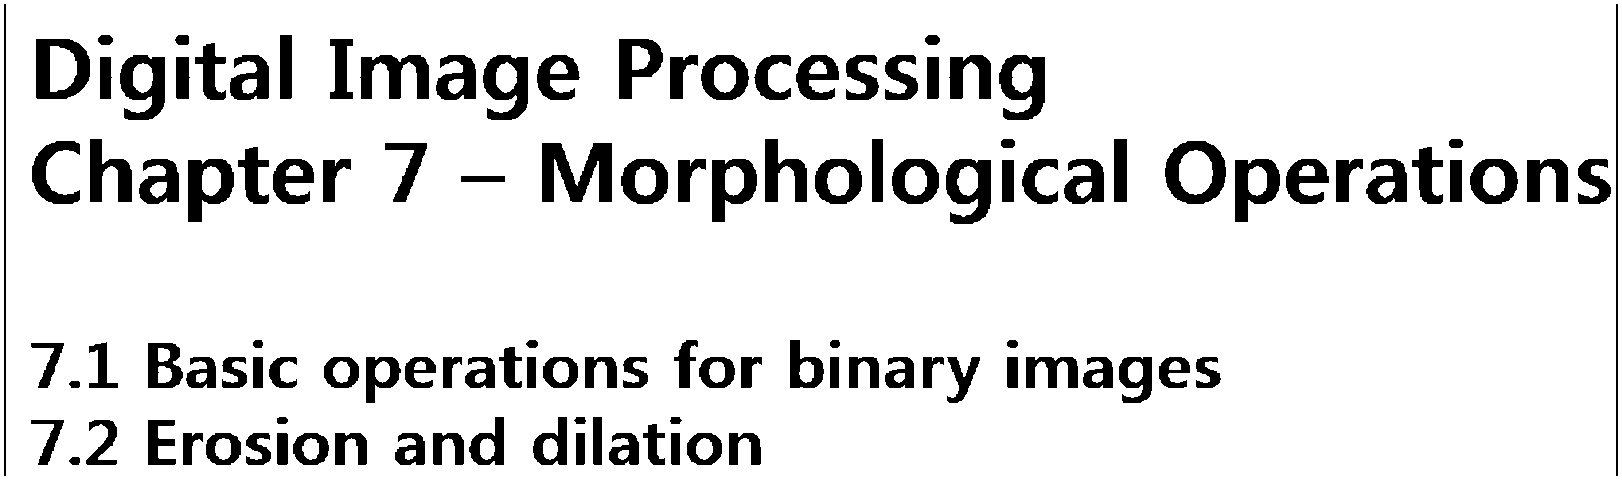

In [51]:
kernel = np.ones((3,1), np.uint8)
dilate = cv2.dilate(gBin, kernel, iterations=1)
cv2_imshow(dilate)

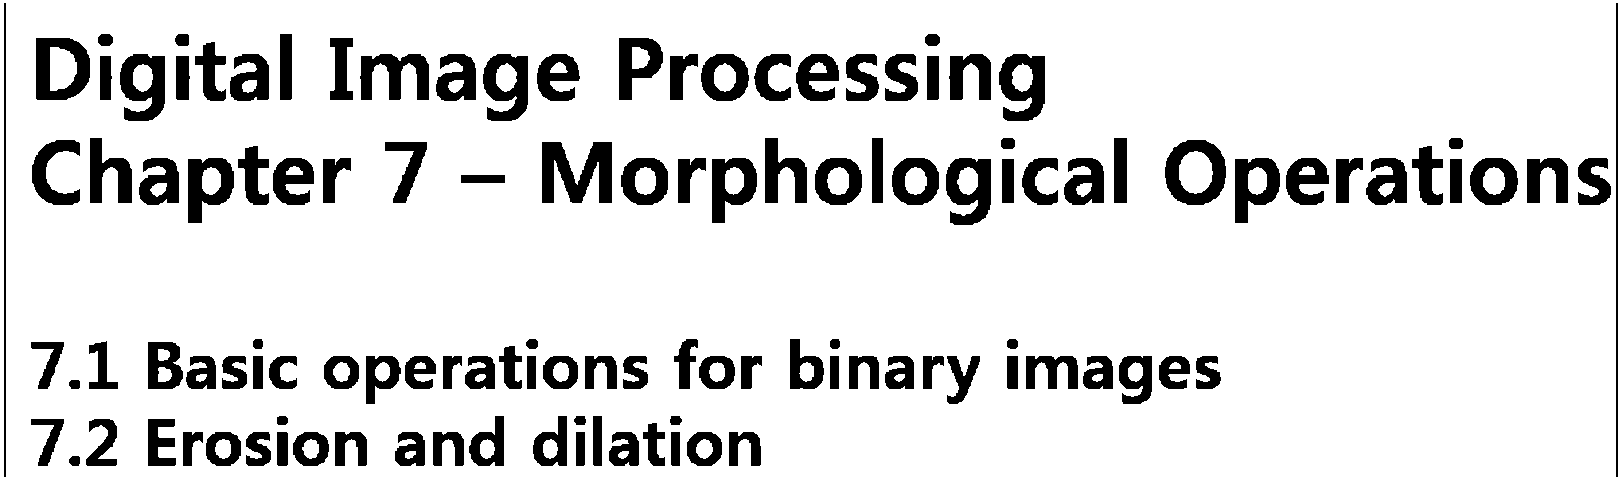

In [52]:
kernel = np.ones((3,1), np.uint8)
erosion = cv2.erode(dilate, kernel, iterations=1)
cv2_imshow(erosion)